In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ErrorbarContainer object of 3 artists>

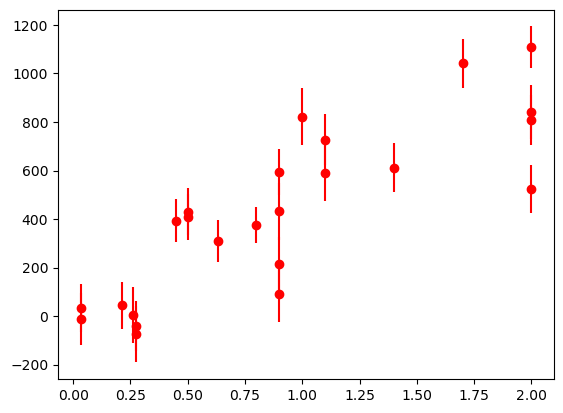

In [48]:
data = np.genfromtxt('data.dat', names='x, y, ey')
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
# print(data[0], data[-1])

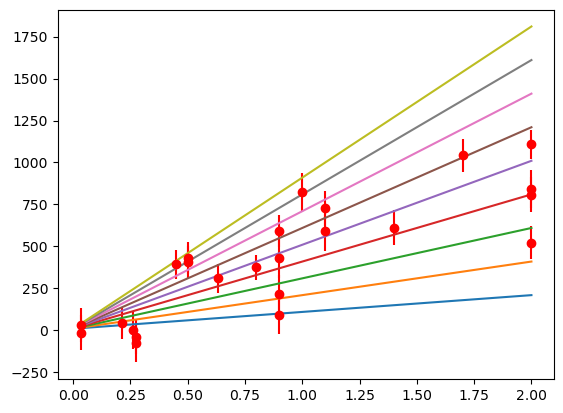

In [74]:
# define the model (y = mx + b)
def line_model(params, x):
    y = params[0] * x + params[1]
    return y
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')    
for i in range(1, 10):
    plt.plot(data['x'], line_model((i*100, 10), data['x']))


In [76]:
def get_chisq(params, data):
    model = line_model(params, data['x'])
    dY = data['y'] - model
    chisq = np.sum((dY/data['ey']) ** 2)
    return chisq

157.9215746220067 (300, 10)
150.70594548780258 (300, 20)
143.96767752687038 (300, 30)
137.70677073921001 (300, 40)
131.92322512482153 (300, 50)
126.61704068370489 (300, 60)
121.78821741586009 (300, 70)
117.43675532128717 (300, 80)
113.56265439998607 (300, 90)
113.56265439998607


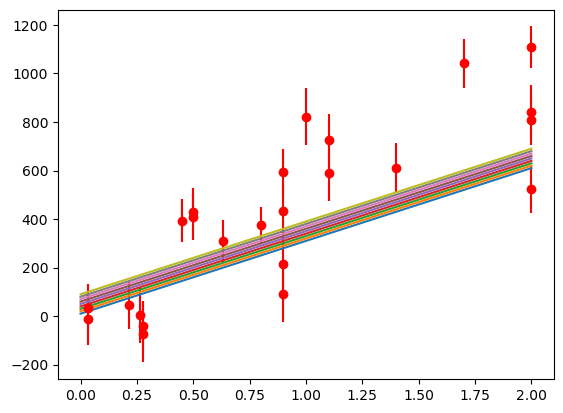

In [122]:
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
chisqs = []
for i in range(1, 10):
    params = 300, i*10
    modelx = np.linspace(0,2,50)
    modely = line_model(params, modelx)
    plt.plot(modelx, modely);
    chisq = get_chisq(params, data)
    chisqs.append(chisq)
    print(chisq, params)

print(min(chisqs))
# plt.annotate(r"$\chi^2 = {:.2f}$".format(chisq), xy=(0, 1100), fontsize='12')

In [128]:
likelihood = np.exp(-chisq/2)
print("likelihood:", likelihood)

likelihood: 2.1886832884423776e-25
